In [8]:
#Group HW with Assel @AD4336

# HW3 Assignment 2 Citibike Data using example notebook 

#IDEA:
#Customers (short term passes) are less likely than Subscribers (longer term passes) to choose biking for commuting
#NULL HYPOTHESIS:
#The ratio of Subscribers biking on weekends over Subscribers biking on weekdays is the same or higher than the ratio 
#of Customers biking over weekends to Customers biking on weekdays
#ALLTERNATIVE HYPOTEHSIS: 
#The ratio of Subscribers biking on weekends over Subscribers biking on weekdays is lower than the ratio of Customers biking 
#over weekends to Customers biking on weekdays 

from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline
print (os.environ)
#print (os.environ.get('PATH'))

#print(os.environ.get('HOME'))

print(os.environ.get('PUIDATA'))

#print os.environ['HOME']
#if os.getenv ('PATH') not in os.environ:
#print ("Must set env variable PUI2017")
if os.environ.get ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


#s = json.load( open(os.getenv('PUI2017') + "/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

#print (os.environ)

Populating the interactive namespace from numpy and matplotlib
{'TERM_PROGRAM_VERSION': '388.1.1', 'PUI2017': '/Users/seastar/PUI2017', 'LOGNAME': 'seastar', 'USER': 'seastar', 'PATH': '/Users/seastar/anaconda2/bin:/Users/seastar/anaconda2/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/seastar', 'HOME': '/Users/seastar', 'TERM_PROGRAM': 'Apple_Terminal', 'LANG': 'en_US.UTF-8', 'TERM': 'xterm-color', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.AFn6QhLT4h/Render', 'SHLVL': '1', 'XPC_FLAGS': '0x0', 'TMPDIR': '/var/folders/8g/9zfr1gk54t1g_cg12h9q082c0000gn/T/', 'TERM_SESSION_ID': '44EED182-0ABF-47AF-9F25-54875B3E30DF', 'XPC_SERVICE_NAME': '0', 'JPY_PARENT_PID': '3542', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.n08HOnU75m/Listeners', 'SHELL': '/bin/bash', 'GIT_PAGER': 'cat', '_': '/Users/seastar/anaconda2/bin/jupyter', 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline', 'OLDPWD': '/Users/seastar/PUI2017/database_lab', 'CLICOLOR': '1', '__CF_USER_TEXT_E

In [ ]:
#%env
#print (os.environ)

In [ ]:
#download the two Citibike dataset files 
os.system("curl -O https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip")

os.system("curl -O https://s3.amazonaws.com/tripdata/201607-citibike-tripdata.zip")



In [ ]:
os.system("ls -l 201601-citibike-tripdata.zip")
                ###  To move it, use the os.system() functions to run bash commands with arguments
#print(os.getenv("PUIDATA"))
#os.system("mv 201601-citibike-tripdata.zip" + str(os.getenv("PUIDATA")))

%mv 201601-citibike-tripdata.zip PUIDATA
#ls -l PUIDATA
#os.system("mv 201607-citibike-tripdata.zip" + os.getenv("PUIDATA"))

            ### unzip the csv 
#os.system("unzip " + os.getenv("PUIDATA") + "/201601-citibike-tripdata.zip")
#os.system("unzip " + os.getenv("PUIDATA") + "/201607-citibike-tripdata.zip")

In [ ]:
os.system("ls -l 201601-citibike-tripdata.zip")

In [12]:
%mv 201607-citibike-tripdata.zip PUIDATA
#moved the file from download dir to PUIDATA 

In [13]:
### unzip the csv 
os.system("unzip " + str(os.getenv("PUIDATA")) + "/201601-citibike-tripdata.zip" + " -d " +str(os.getenv("PUIDATA")) )
os.system("unzip " + str(os.getenv("PUIDATA")) + "/201607-citibike-tripdata.zip" + " -d " +str(os.getenv("PUIDATA")) )

2304

In [9]:
#File 1 

df = pd.read_csv(os.getenv("PUIDATA") + "/201601-citibike-tripdata.csv")
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


In [10]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)

df.head()

,usertype,date
0,Subscriber,2016-01-01 00:00:41
1,Subscriber,2016-01-01 00:00:45
2,Subscriber,2016-01-01 00:00:48
3,Subscriber,2016-01-01 00:01:06
4,Subscriber,2016-01-01 00:01:12


In [34]:
df.describe()

,usertype,date
count,509478,509478
unique,2,420479
top,Subscriber,2016-01-12 18:56:25
freq,484935,7
first,NaN,2016-01-01 00:00:41
last,NaN,2016-01-31 23:59:26


In [38]:
#print (df.isnull().any(axis=1))
df.isnull().any().any()

False

In [11]:

#File 2

df2 = pd.read_csv(os.getenv("PUIDATA") + "/201607-citibike-tripdata.csv")
# df is the dataframe where the content of the csv file is stored
df2['date'] = pd.to_datetime(df2['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df2.head()
                  
                  
                  

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0,2016-07-01 00:00:02
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1,2016-07-01 00:00:18
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2,2016-07-01 00:00:19
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0,2016-07-01 00:00:24
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0,2016-07-01 00:00:31


In [45]:
len(df2.columns)


2

In [12]:
df2.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender'], axis=1, inplace=True)
df2.head()

,usertype,date
0,Customer,2016-07-01 00:00:02
1,Subscriber,2016-07-01 00:00:18
2,Subscriber,2016-07-01 00:00:19
3,Customer,2016-07-01 00:00:24
4,Customer,2016-07-01 00:00:31


In [41]:
df2.describe()


,usertype,date
count,1380110,1380110
unique,2,944935
top,Subscriber,2016-07-11 17:54:14
freq,1178219,9
first,NaN,2016-07-01 00:00:02
last,NaN,2016-07-31 23:59:59


In [42]:
df2.isnull().any().any()

False

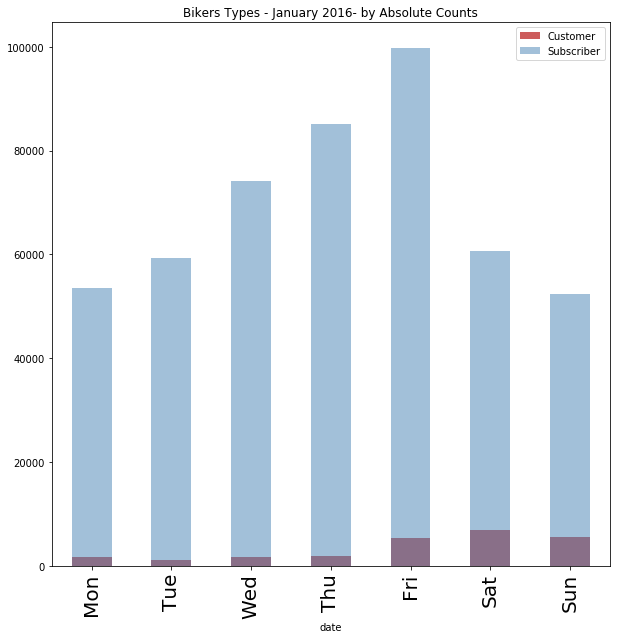

In [47]:
#goal is to separate Subscriber vs Customer in user type .. similar to Gender example 
#calculating for customer first, then for subscriber 
fig = pl.figure(figsize(10,10))

#instead of plotting with matplotlib i.e. plot() , use plot method in pandas
norm_c = 1 #norm_w
((df['date'][df['usertype'] == "Customer"].groupby([df['date'].dt.weekday]).count()) / norm_c).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Customer')

norm_s = 1
ax = ((df['date'][df['usertype'] == "Subscriber"].groupby([df['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Subscriber', 
                                                                                              title= 'Bikers Types - January 2016- by Absolute Counts')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()


#Figure 1a: Distribution of Citibike bikers by Customer Type in January 2016, absolute counts

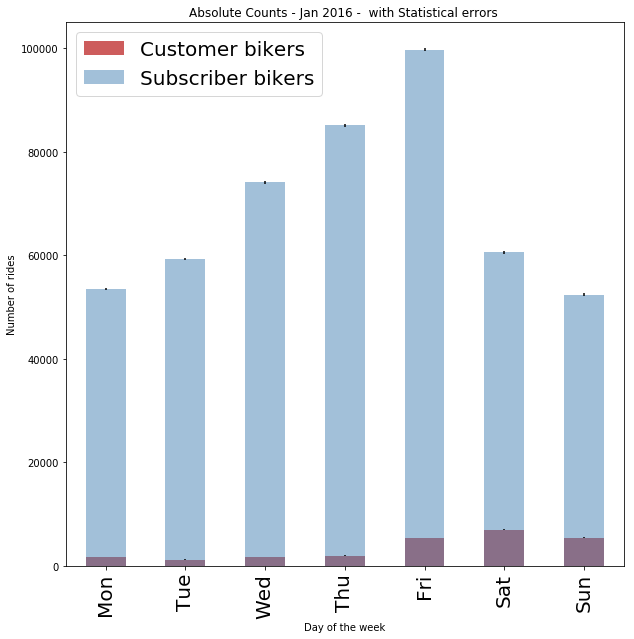

In [14]:
#Recalculating for error 
fig=pl.figure(figsize(10,10))

counts_c = df.date[df.usertype == "Customer"].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='Customer bikers',title= "Absolute Counts - Jan 2016 -  with Statistical errors ")


counts_s = df.date[df.usertype=="Subscriber"].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='Subscriber bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Customer bikers','Subscriber bikers'], fontsize=20)

#Figure 1b: Distribution of Citibike bikers by type in January 2016, absolute counts, with statistical errors

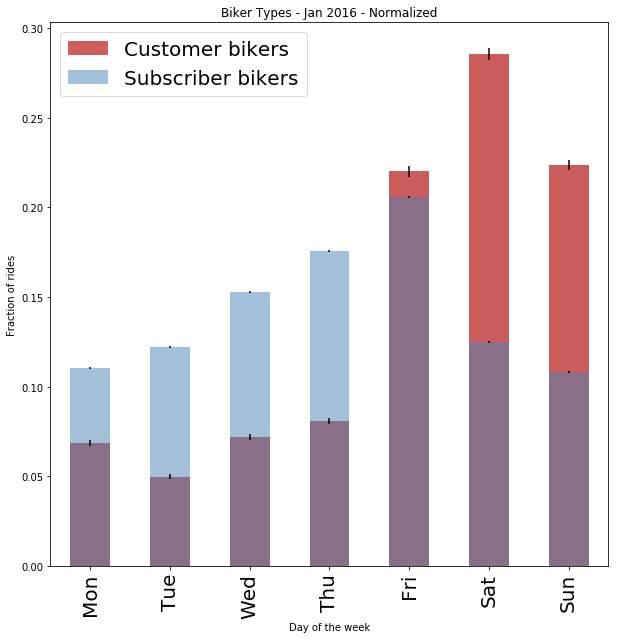

In [15]:
#Ratios in order to normalize (so we can compare regardless of total counts).. divide by the total number of counts for that customer type
fig = pl.figure(figsize(10,10))

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='customer bikers', 
                           title="Biker Types - Jan 2016 - Normalized")

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='subscriber bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Customer bikers','Subscriber bikers'],fontsize=20)

#Figure 2: Distribution of Citibike bikers by User type in January 2016, normalized

date
0    1679
1    1222
2    1765
3    1981
4    5403
5    7004
6    5489
Name: date, dtype: int64
24543
date
0    53569
1    59323
2    74118
3    85190
4    99728
5    60580
6    52427
Name: date, dtype: int64
484935
date
0    1679
1    1222
2    1765
3    1981
4    5403
Name: date, dtype: int64
484935
date
0    53569
1    59323
2    74118
3    85190
4    99728
Name: date, dtype: int64
Subscribers: week:0.767, weekend:0.233, weekend error:0.001, weekend error:0.001
Customer: week:0.491, weekend:0.509, weekend error:0.004, weekend error:0.005


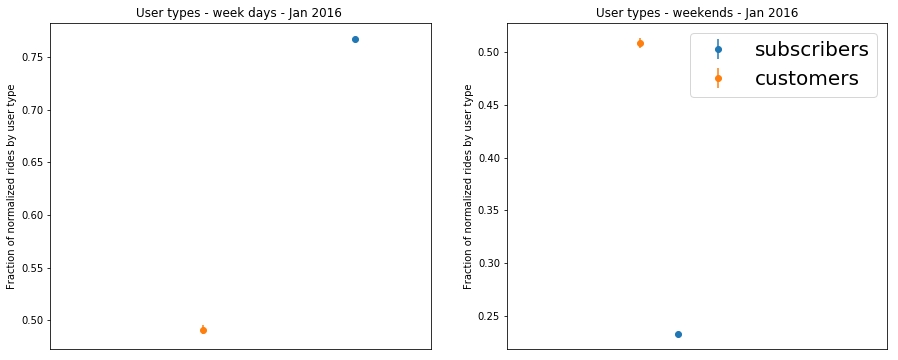

In [16]:
#The next test is on porportions of Customers during the week and porportions of Customer during the weekend. 
#Will also calculate the porportion of Subscribers during the week and porportion of Subscribers during the weekend. 
#Then, repeat the same for Subscribers 

fig = pl.figure(figsize(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])
print(counts_c)
print (norm_c)

print (counts_s)
print (norm_s)

print(counts_c[:-2])
print(norm_s)
print(counts_s[:-2])
week_c = sum(counts_c[:-2]) * 1.0 / norm_c  #fraction of customers riding on week days
weekend_c = sum(counts_c[-2:]) * 1.0 / norm_c  #fraction of customers riding on weekends
eweek_c = np.sqrt(sum(error_c[:-2]**2)) / norm_c  #error on fraction number of customers riding on week days
eweekend_c = np.sqrt(sum(error_c[-2:]**2)) / norm_c #error on fraction number of customers riding on weekends

#same nomenclature as above
week_s = sum(counts_s[:-2]) * 1.0 / norm_s
weekend_s = sum(counts_s[-2:]) * 1.0 / norm_s
eweek_s = np.sqrt(sum(error_s[:-2]**2)) / norm_s
eweekend_s = np.sqrt(sum(error_s[-2:]**2)) / norm_s

print("Subscribers: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_s, weekend_s, eweek_s, eweekend_s))
print("Customer: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_c, weekend_c, eweek_c, eweekend_c))

ax1.errorbar([0.4], [week_s], yerr=[eweek_s], fmt='o', label='subscribers')
ax1.errorbar([0.2], [week_c], yerr=[eweek_c], fmt='o', label='customers')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_s], yerr=[eweekend_s], fmt='o', label='subscribers')
ax2.errorbar([0.2], [weekend_c], yerr=[eweekend_c], fmt='o', label='customers')
ax1.set_xlim(0, 0.5)
ax1.set_title("User types - week days - Jan 2016 ")
ax2.set_title("User types - weekends - Jan 2016")
ax2.set_ylabel("Fraction of normalized rides by user type")
ax1.set_ylabel("Fraction of normalized rides by user type")

pl.xlim(-0.5, 1.5)
pl.legend(fontsize = 20)

#Figure 3: Fraction of Citibike bikers per user type in January 2016 for week days (left) and weekends (right)

In [17]:
#Is the percentage of customers lower or equal to the number of subscribers who ride on the weekends 

P0mP1 = weekend_c - weekend_s
print ("difference between Subscribers and Customers on the weekend: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between Subscribers and Customers on the weekend:  0.275989621318
We must check the significance before we reject the Null Hypothesis


In [18]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_c, weekend_s, norm_c, norm_s), norm_c, norm_s)
# print (sp_stdev_mw)
z = zscore(weekend_c, weekend_s, sp_stdev_mw)
print ("The z statistics is %.2f"%z)

The z statistics is 97.90


In [ ]:
## COnclusion here on rejecting the Null 
#In this case the Z statistic is very high at 97.9 - which yeilds a corresponding p value of < .0002. 

#This means that the p-value is much smaller than the alpha of .05 that was chosen at the begining of this exercise.

#Since the pvalue is smaller than our alpha, we reject the null hypothesis that there are an equal or greater number of
#subscriber riders as customer riders riding on the weekends as compared to the weekdays during Jan 2016. 

#As it turns out, the ratio difference observed in the last figure featuring fractions of riders side by side plots 
#are statistically significant. The plots show a greater portion of subscriber riders during weekedays rather than customers, and on the weekends the porportion trend is reversed with a greater porportion of customer riders rather than subscibers. 

##=====
##=====

##Reminder IDEA:
#Customers (1 day or 3 day pass holders) are less likely than Subscribers (longer term users) to choose biking for commuting during the week.
#NULL HYPOTHESIS:
#The ratio of Subscribers biking on weekends over Subscribers biking on weekdays is the same or higher than the ratio 
#of Customers biking over weekends to Customers biking on weekdays
#ALTERNATIVE HYPOTHESIS: 
#The ratio of Subscribers biking on the 


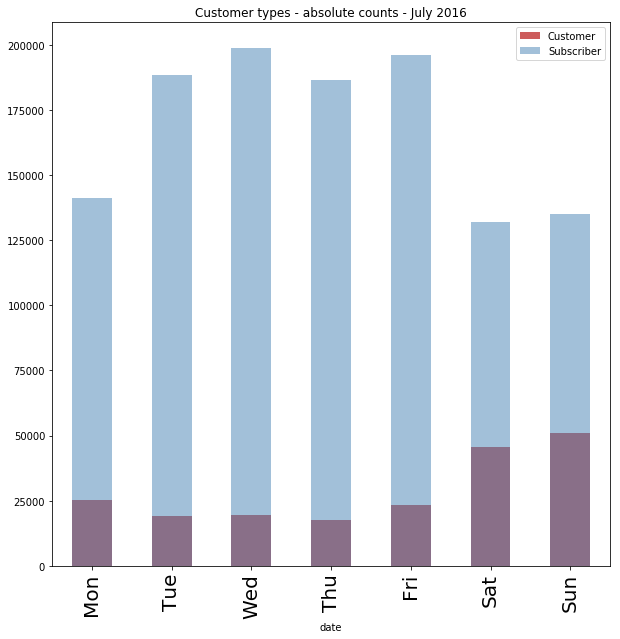

In [19]:
#Second File From Summer July 2016 

#goal is to separate Subscriber vs Customer in user type .. similar to Gender example 
#calculating for customer first, then for subscriber 
fig = pl.figure(figsize(10,10))

#instad of plotting with matplotlib i.e. plot() , use plot method in pandas
norm_c = 1 #norm_w
((df2['date'][df2['usertype'] == "Customer"].groupby([df2['date'].dt.weekday]).count()) / norm_c).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Customer',
                                                                                         title="Customer types - absolute counts - July 2016")

norm_s = 1
ax = ((df2['date'][df2['usertype'] == "Subscriber"].groupby([df2['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Subscriber')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()


#Figure 2a: Distribution of Citibike bikers by Customer Type in July 2016, absolute counts

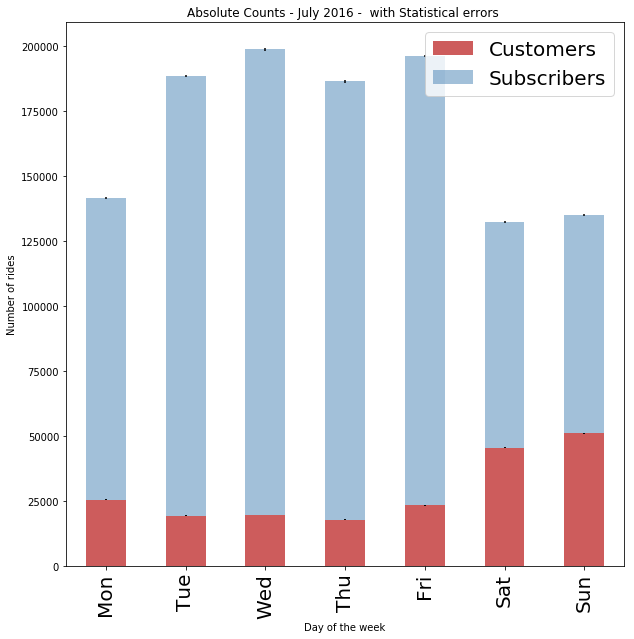

In [49]:
#Recalculating for error 
fig=pl.figure(figsize(10,10))

counts_c = df2.date[df2.usertype == "Customer"].groupby([df2.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='Customer bikers',title= "Absolute Counts - July 2016 -  with Statistical errors ")


counts_s = df2.date[df2.usertype=="Subscriber"].groupby([df2.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='Subscriber bikers')

ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='Customer bikers',title= "Absolute Counts - July 2016 -  with Statistical errors ")



ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.legend(['Customers','Subscribers'],fontsize=20)

#Figure 2b: Distribution of Citibike bikers by user type in Jan 2016, absolute counts, with statistical errors

#### Ratios in order to normalize (so we can compare regardless of total counts).. divide by the total number of counts for that customer type
fig = pl.figure(figsize(10,10))

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='customer bikers',
                           title="User types normalized - July 2016")

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='subscriber bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")

pl.legend(['Customer bikers','Subscriber bikers'],fontsize=20)

#Figure 3: Distribution of Citibike bikers by User type in July 2016, normalized

In [22]:
counts_c07 = df2.date[df2.usertype == "Customer"].groupby([df2.date.dt.weekday]).count()
counts_s07 = df2.date[df2.usertype == "Subscriber"].groupby([df2.date.dt.weekday]).count()
norm_c07 = counts_c07.sum()
norm_s07 = counts_s07.sum()
error_c07 = np.sqrt(counts_c07)
error_s07 = np.sqrt(counts_s07)


In [23]:
print (norm_s07)
print (counts_s07)

print (norm_c07)

1178219
date
0    141379
1    188455
2    198662
3    186328
4    196228
5    132150
6    135017
Name: date, dtype: int64
201891


Subscriber: week:0.773, weekend:0.227, weekend error:0.001, weekend error:0.000
Customer: week:0.773, weekend:0.227, weekend error:0.001, weekend error:0.000
The z statistics is 97.90


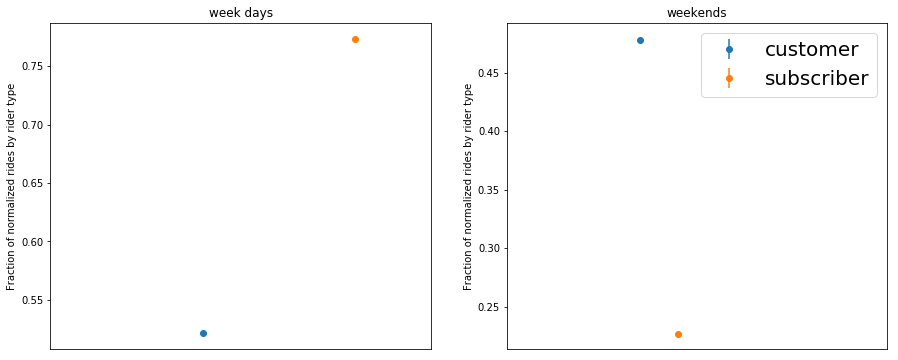

In [25]:
#The next test is on porportions of Customers during the week and porportions of Customer during the weekend. 
#Will also calculate the porportion of Subscribers during the week and porportion of Subscribers during the weekend. 
#Then, repeat the same for Subscribers 
fig=pl.figure(figsize(15,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_xticks([])
ax2.set_xticks([])

week_c07 = sum(counts_c07[:-2]) * 1.0 / norm_c07
weekend_c07 = sum(counts_c07[-2:])*1.0 / norm_c07
eweek_c07 = np.sqrt(sum(error_c07[:-2]**2)) / norm_c07
eweekend_c07 = np.sqrt(sum(error_c07[-2:]**2)) / norm_c07

week_s07 = sum(counts_s07[:-2]) * 1.0 / norm_s07
weekend_s07 = sum(counts_s07[-2:]) * 1.0 / norm_s07
eweek_s07 = np.sqrt(sum(error_s07[:-2]**2)) / norm_s07
eweekend_s07 = np.sqrt(sum(error_s07[-2:]**2)) / norm_s07

print("Subscriber: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_s07, weekend_s07, eweek_s07, eweekend_s07))
print("Customer: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_s07, weekend_s07, eweek_s07, eweekend_s07))

ax1.errorbar([0.2],[week_c07], yerr=[eweek_c07], fmt='o', label='customer')
ax1.errorbar([0.4],[week_s07], yerr=[eweek_s07], fmt='o', label='subscriber')
ax1.set_xlim(0,0.5)
ax2.errorbar([0.2],[weekend_c07], yerr=[eweekend_c07], fmt='o', label='customer')
ax2.errorbar([0.4],[weekend_s07], yerr=[eweekend_s07], fmt='o', label='subscriber')
ax1.set_xlim(0,0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by rider type")
ax1.set_ylabel("Fraction of normalized rides by rider type")

pl.xlim(-0.5,1.5)
pl.legend(fontsize=20)


sp_stdev_cs07 = se(p(weekend_c07, weekend_s07, norm_c07, norm_s07), norm_c07, norm_s07)
# print (sp_stdev_mw)
z07 = zscore(weekend_c07, weekend_s07, sp_stdev_cs07)
print ("The z statistics is %.2f"%z)

#Figure 3: Fraction of Citibike bikers per user type in January 2016 for week days (left) and weekends (right)


In [26]:
#Is the percentage of customers lower or equal to the number of subscribers who ride on the weekends 

P0mP1 = weekend_c - weekend_s
print ("difference between Subscribers and Customers on the weekend: ", P0mP1)
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between Subscribers and Customers on the weekend:  0.275989621318
We must check the significance before we reject the Null Hypothesis


In [27]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

p = lambda p0, p1, n0, n1: (p0 * n0 + p1 * n1) / (n0 + n1)
se = lambda p, n0, n1: np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
zscore = lambda p0, p1, s : (p0 - p1) / s

# calculations

sp_stdev_mw = se(p(weekend_c, weekend_s, norm_c, norm_s), norm_c, norm_s)
# print (sp_stdev_mw)
z = zscore(weekend_c, weekend_s, sp_stdev_mw)
print ("The z statistics is %.2f"%z)
print (weekend_c)
print (weekend_s)
print (sp_stdev_mw)

The z statistics is 257.07
0.509024976572
0.233035355254
0.00107358560893


In [123]:
#Conclusion: In the July 2016 data set, we likewise observe an even higher z statistic which translates to an even smaller 
#pvalue less than p<0.0002 which would be much smaller than the alpha level of .05. 
#As a result, we reject the null hypothesis that the number of Subscribers biking on the weekends over Subscribers biking on the weekdays is the same or higher than the ration of Customers (short term)
#biking on weekends over the Customers biking on weekdays. 
#That means that the counter pattrn is even stronger in July 2016 than it was in Jan 2016. 
# 

#IDEA:
#Customers are less likely than Subscribers to choose biking for commuting
#NULL HYPOTHESIS:
#The ratio of Subscribers biking on weekends over Subscribers biking on weekdays is the same or higher than the ratio 
#of Customers biking over weekends to Customers biking on weekdays


#Overall Note: - Initially, it was disconcerting to say the least that the z scores were so high in each case as it seemed that perhaps something 
#might have gone astray, however in looking closer at the data, one sees that there are real scale differences in first the porportion of riders who subscribe somewhere in the one million range for weekdays versus those who are short term customers, somewere in the 200,000 range. There alone is about 5x difference in magnitude. However, when looking at the porportions of daily number of raiders in either group as compared to the total number of riders for that week period, the porportion of a day's worth of riders in 
#each category compared to its own sum suggests that the porportion might be similar at some points during the week. Yet on the weekends, 

In [28]:
#Checking the effect size as in prof's example with gender

r = lambda z, n0, n1 : z / np.sqrt(n0+n0)
h = lambda p0, p1: 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [29]:
r01 = r(z, norm_c, norm_s)  #norm_w is norm_c. 
r06 = r(z06, norm_c06, norm_s06)
print (r01, r06)

NameError: name 'z06' is not defined

In [30]:
values = np.array([[week_s* norm_s, weekend_s*norm_s],[week_c*norm_c, weekend_c*norm_c]])
print(values)


[[ 903652.31676823  274566.68323177]
 [  99123.43845496  102767.56154504]]


In [31]:

def evalChisq(values):
    '''Evaluates the chi sq from a contingency value
    Arguments:
    values: 2x2 array or list, the contingengy table
    '''
    if not (len(values.shape) == 2 and values.shape == (2,2)):
        print ("must pass a 2D array")
        return -1
    values = np.array(values)
    E = np.empty_like(values)
    for j in range(len(values[0])):
        for i in range(2):
            
            E[i][j] = ((values[i,:].sum() * values[:,j].sum()) / 
                        (values).sum())
    return ((values - E)**2 / E).sum()


In [32]:
chisq = evalChisq(values)
print(chisq)


66086.4066798


In [33]:

dof = len(values) - 1
print(dof)

1
